<h1 style=color:lime;background-color:red;text-align:center;>
    Laptop_Price_Prediction_Linear_Regression_Model</h1>

In [1]:
#importing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import joblib

In [2]:
#Reading the Dataset
df=pd.read_csv("laptop_price.csv", encoding='latin')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
laptops=df.drop(columns='laptop_ID') #Droping the laptop_ID column
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df['Ram'].head()

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: Ram, dtype: object

In [6]:
laptops["Ram"] = laptops["Ram"].str.replace('GB', '')
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
laptops["Weight"] = laptops["Weight"].str.replace('kg', '') #Replacing the 'kg' with ''
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [8]:
df['Weight'].dtypes #checking the type of data

dtype('O')

In [9]:
laptops['Memory'] = laptops['Memory'].astype(str).replace('\.0', '', regex=True)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [10]:
laptops['Memory'].unique() #Displaying the usinque values

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1TB Hybrid', '256GB SSD +  1TB Hybrid'], dtype=object)

In [11]:
laptops["Memory"] = laptops["Memory"].str.replace('GB', '')
laptops["Memory"] = laptops["Memory"].str.replace('TB', '000') #Replacing 'TB' with '000'
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [12]:
laptops.Memory.unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [13]:
new2 = laptops["Memory"].str.split("+", n = 1, expand = True) 
#If there is multiple type of memory attached then with a "+" sign it will split the into 2 separate columns.(0 and 1)
new2.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [14]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [15]:
laptops["first"]= new2[0]
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD


In [16]:
laptops['first'].head()

0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: first, dtype: object

In [17]:
laptops["first"]=laptops["first"].str.strip() #strip() function Remove unnecessay spaces from before and after.
laptops['first'].head()

0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: first, dtype: object

In [18]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD


In [19]:
laptops["second"]= new2[1]
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage,None
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD,None
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD,None
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD,None


In [20]:
laptops['second'].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [21]:
laptops['first'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '64 Flash Storage', '32 SSD', '2000 HDD', '64 SSD', '1000 Hybrid',
       '1000 SSD', '16 SSD', '16 Flash Storage', '180 SSD', '32 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid'],
      dtype=object)

In [22]:
laptops["Layer1HDD"] = laptops["first"].apply(lambda x: 1 if "HDD" in x else 0) 
#If inside "first" column there is HDD then the value will be "1" in the "layer1HDD" columns otherwise the value will be zero.
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage,None,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD,None,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD,None,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD,None,0


In [23]:
laptops.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,638.0,128 SSD,None,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,1499.0,512 SSD,None,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,229.0,64 Flash Storage,None,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0,1000 HDD,None,1
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500 HDD,Intel HD Graphics,Windows 10,2.2,369.0,500 HDD,None,1


In [24]:
laptops["Layer1SSD"] = laptops["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage,None,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD,None,0,1
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD,None,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD,None,0,1


In [25]:
laptops["Layer1Hybrid"] = laptops["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None,0,1,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage,None,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD,None,0,1,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD,None,0,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD,None,0,1,0


In [26]:
laptops["Layer1Flash_Storage"] = laptops["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128 SSD,None,0,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128 Flash Storage,None,0,0,0,1
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256 SSD,None,0,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512 SSD,None,0,1,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256 SSD,None,0,1,0,0


In [27]:
laptops['first'] = laptops['first'].str.replace(r'\D', '', regex=True)
laptops['first'].head()

0    128
1    128
2    256
3    512
4    256
Name: first, dtype: object

In [28]:
laptops["second"].fillna("0", inplace = True)
laptops['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: object

In [29]:
laptops["Layer2HDD"] = laptops["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptops['Layer2HDD'].head()

0    0
1    0
2    0
3    0
4    0
Name: Layer2HDD, dtype: int64

In [30]:
laptops["Layer2SSD"] = laptops["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptops['Layer2SSD'].head()

0    0
1    0
2    0
3    0
4    0
Name: Layer2SSD, dtype: int64

In [31]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,0,0,1,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,128,0,0,0,0,1,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,0,0,1,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,0,0,1,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,0,0,1,0,0,0,0


In [32]:
laptops["Layer2Hybrid"] = laptops["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Price_euros,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,1339.69,128,0,0,1,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,898.94,128,0,0,0,0,1,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,575.00,256,0,0,1,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,2537.45,512,0,0,1,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,1803.60,256,0,0,1,0,0,0,0,0


In [33]:
laptops["Layer2Flash_Storage"] = laptops["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,256,0,0,1,0,0,0,0,0,0


In [34]:
laptops['second'] = laptops['second'].str.replace(r'\D', '', regex=True)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,256,0,0,1,0,0,0,0,0,0


In [35]:
laptops['second'].dtypes

dtype('O')

In [36]:
laptops['first'].dtypes

dtype('O')

In [37]:
laptops["first"] = laptops["first"].astype(int)
laptops['first'].head()

0    128
1    128
2    256
3    512
4    256
Name: first, dtype: int32

In [38]:
laptops["second"] = laptops["second"].astype(int)
laptops['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int32

In [39]:
laptops['Layer1SSD'].head()

0    1
1    0
2    1
3    1
4    1
Name: Layer1SSD, dtype: int64

In [40]:
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,128,0,0,1,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,128,0,0,0,0,1,0,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,256,0,0,1,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,512,0,0,1,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,256,0,0,1,0,0,0,0,0,0


In [41]:
laptops["Total_Memory"]=(laptops["first"]*(laptops["Layer1HDD"]+laptops["Layer1SSD"]+laptops["Layer1Hybrid"]+laptops["Layer1Flash_Storage"])+laptops["second"]*(laptops["Layer2HDD"]+laptops["Layer2SSD"]+laptops["Layer2Hybrid"]+laptops["Layer2Flash_Storage"]))
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,1,0,0,0,0,0,0,128
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,0,0,1,0,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,0,0,1,0,0,0,0,0,0,256
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,0,0,1,0,0,0,0,0,0,512
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,1,0,0,0,0,0,0,256


In [42]:
laptops["Memory"]=laptops["Total_Memory"]
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,1,0,0,0,0,0,0,128
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,0,0,1,0,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,1,0,0,0,0,0,0,256
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,1,0,0,0,0,0,0,512
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,1,0,0,0,0,0,0,256


In [43]:
laptops["HDD"]=(laptops["first"]*laptops["Layer1HDD"]+laptops["second"]*laptops["Layer2HDD"])
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,1,0,0,0,0,0,0,128,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,0,1,0,0,0,0,128,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,1,0,0,0,0,0,0,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,1,0,0,0,0,0,0,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,1,0,0,0,0,0,0,256,0


In [44]:
laptops["SSD"]=(laptops["first"]*laptops["Layer1SSD"]+laptops["second"]*laptops["Layer2SSD"])
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,1,0,0,0,0,0,0,128,0,128
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,1,0,0,0,0,128,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,1,0,0,0,0,0,0,256,0,256
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,1,0,0,0,0,0,0,512,0,512
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,1,0,0,0,0,0,0,256,0,256


In [45]:
laptops["Hybrid"]=(laptops["first"]*laptops["Layer1Hybrid"]+laptops["second"]*laptops["Layer2Hybrid"])
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,128,0,128,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,1,0,0,0,0,128,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,0,0,0,0,256,0,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,0,0,0,0,512,0,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,0,256,0,256,0


In [46]:
laptops["Flash_Storage"]=(laptops["first"]*laptops["Layer1Flash_Storage"]+laptops["second"]*laptops["Layer2Flash_Storage"])
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,128,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,1,0,0,0,0,128,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,0,0,0,256,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,0,0,0,512,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,256,0,256,0,0


In [47]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [48]:
new = laptops["ScreenResolution"].str.split("x", n = 1, expand = True)
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [49]:
new[0].unique()

array(['IPS Panel Retina Display 2560', '1440', 'Full HD 1920',
       'IPS Panel Retina Display 2880', '1366', 'IPS Panel Full HD 1920',
       'IPS Panel Retina Display 2304',
       'IPS Panel Full HD / Touchscreen 1920',
       'Full HD / Touchscreen 1920', 'Touchscreen / Quad HD+ 3200',
       'IPS Panel Touchscreen 1920', 'Touchscreen 2256',
       'Quad HD+ / Touchscreen 3200', 'IPS Panel 1366',
       'IPS Panel 4K Ultra HD / Touchscreen 3840',
       'IPS Panel Full HD 2160', '4K Ultra HD / Touchscreen 3840',
       'Touchscreen 2560', '1600', 'IPS Panel 4K Ultra HD 3840',
       '4K Ultra HD 3840', 'Touchscreen 1366', 'IPS Panel Full HD 1366',
       'IPS Panel 2560', 'IPS Panel Full HD 2560',
       'IPS Panel Retina Display 2736', 'Touchscreen 2400', '2560',
       'IPS Panel Quad HD+ 2560', 'IPS Panel Quad HD+ 3200',
       'IPS Panel Quad HD+ / Touchscreen 3200',
       'IPS Panel Touchscreen 1366', '1920',
       'IPS Panel Touchscreen / 4K Ultra HD 3840',
       'IPS Pa

In [50]:
laptops["X_res"]= new[0]
laptops["Y_res"]= new[1]
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,0,128,0,128,0,0,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,0,128,0,0,0,128,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,0,256,0,256,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,0,512,0,512,0,0,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,0,256,0,256,0,0,IPS Panel Retina Display 2560,1600


In [51]:
laptops['Y_res'].dtypes

dtype('O')

In [52]:
laptops["Y_res"]= pd.to_numeric(laptops["Y_res"])
laptops["Y_res"]= laptops["Y_res"].astype(float)
laptops["Y_res"].head()

0    1600.0
1     900.0
2    1080.0
3    1800.0
4    1600.0
Name: Y_res, dtype: float64

In [53]:
laptops['Y_res'].dtypes

dtype('float64')

In [54]:
laptops["X_res"]=(laptops['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))

In [55]:
laptops["X_res"].head()

0    2560.0
1    1440.0
2    1920.0
3    2880.0
4    2560.0
Name: X_res, dtype: float64

In [56]:
laptops["PPI"]=(((laptops["X_res"]**2+laptops["Y_res"]**2)**(1/2))/laptops["Inches"]).astype(float)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,128,0,128,0,0,2560.0,1600.0,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,128,0,0,0,128,1440.0,900.0,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,256,0,256,0,0,1920.0,1080.0,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,512,0,512,0,0,2880.0,1800.0,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,256,0,256,0,0,2560.0,1600.0,226.983005


In [57]:
laptops["ScreenResolution"]=(laptops["X_res"]*laptops["Y_res"]).astype(float)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,128,0,128,0,0,2560.0,1600.0,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,128,0,0,0,128,1440.0,900.0,127.677940
2,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,256,0,256,0,0,1920.0,1080.0,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,512,0,512,0,0,2880.0,1800.0,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,256,0,256,0,0,2560.0,1600.0,226.983005


In [58]:
laptops["Ram"] = laptops["Ram"].astype(int)
laptops["Weight"] = laptops["Weight"].astype(float)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,Layer2Hybrid,Layer2Flash_Storage,Total_Memory,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,...,0,0,128,0,128,0,0,2560.0,1600.0,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,...,0,0,128,0,0,0,128,1440.0,900.0,127.677940
2,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,...,0,0,256,0,256,0,0,1920.0,1080.0,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,...,0,0,512,0,512,0,0,2880.0,1800.0,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,...,0,0,256,0,256,0,0,2560.0,1600.0,226.983005


In [59]:
laptops['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

In [60]:
laptops=laptops.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
2,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005


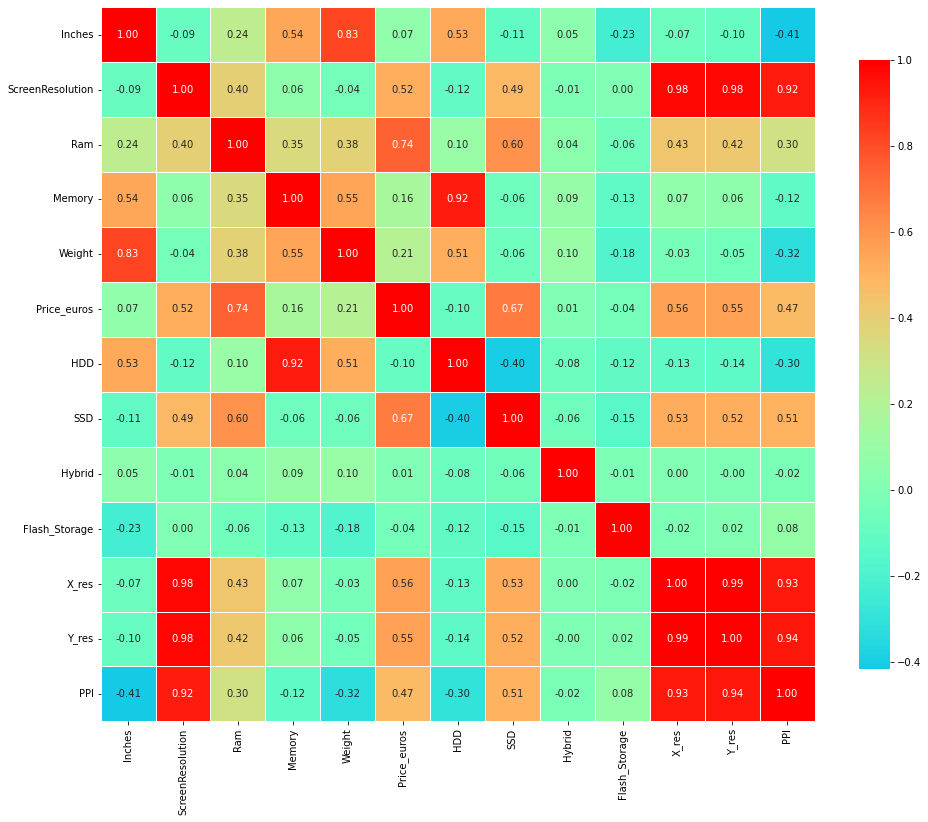

In [61]:
def correlation_heatmap(train):
    correlations = train.corr()
    fig, ax = plt.subplots(figsize=(16,16))
    sb.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70}, cmap='rainbow')
    plt.show()
correlation_heatmap(laptops)

In [62]:
len(laptops.columns)

19

In [63]:
le=LabelEncoder()
for i in range(len(laptops.columns)):
    if laptops[laptops.columns[i]].dtype=='O':
        laptops[laptops.columns[i]]=le.fit_transform(laptops[laptops.columns[i]])

In [64]:
X = laptops.drop(['Price_euros'],axis=1)
y = laptops['Price_euros']

In [65]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
0,1,300,4,13.3,4096000.0,65,8,128,58,8,1.37,0,128,0,0,2560.0,1600.0,226.983005
1,1,301,4,13.3,1296000.0,63,8,128,51,8,1.34,0,0,0,128,1440.0,900.0,127.677940
2,7,50,3,15.6,2073600.0,74,8,256,53,4,1.86,0,256,0,0,1920.0,1080.0,141.211998
3,1,300,4,15.4,5184000.0,85,16,512,9,8,1.83,0,512,0,0,2880.0,1800.0,220.534624
4,1,300,4,13.3,4096000.0,67,8,256,59,8,1.37,0,256,0,0,2560.0,1600.0,226.983005


In [66]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

In [67]:
laptops['Company'].unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print(laptops.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1303, 19)
(1042, 18)
(261, 18)
(1042,)
(261,)


In [70]:
X_train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
10,7,50,3,15.6,1049088.0,74,4,500,53,4,1.86,500,0,0,0,1366.0,768.0,100.454670
147,2,555,3,15.6,2073600.0,37,4,1000,43,5,2.00,1000,0,0,0,1920.0,1080.0,141.211998
1287,7,2,3,15.6,1049088.0,89,6,1000,21,5,2.19,1000,0,0,0,1366.0,768.0,100.454670
767,4,254,1,15.6,8294400.0,92,16,1128,89,5,2.72,1000,128,0,0,3840.0,2160.0,282.423996
816,14,86,4,12.5,8294400.0,96,16,512,53,5,1.29,0,512,0,0,3840.0,2160.0,352.465147


In [71]:
X_test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
479,16,334,3,13.3,2073600.0,74,8,256,53,5,1.05,0,256,0,0,1920.0,1080.0,165.632118
1022,7,417,3,13.3,2073600.0,74,8,256,53,5,1.11,0,256,0,0,1920.0,1080.0,165.632118
298,10,202,3,15.6,2073600.0,0,6,1000,18,5,2.40,1000,0,0,0,1920.0,1080.0,141.211998
1265,10,225,3,15.6,2073600.0,92,8,1000,89,5,2.60,1000,0,0,0,1920.0,1080.0,141.211998
774,7,110,4,12.5,1049088.0,68,4,256,47,5,1.26,0,256,0,0,1366.0,768.0,125.367428


In [72]:
y_train.head()

10       393.9
147      344.0
1287     764.0
767     1099.0
816     1799.0
Name: Price_euros, dtype: float64

In [73]:
y_test.head()

479     1672.0
1022    1149.0
298      499.0
1265     899.0
774     1244.0
Name: Price_euros, dtype: float64

In [74]:
laptops['Company'].unique()

array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
        5,  9])

In [75]:
model=LinearRegression()

In [76]:
model.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred=model.predict(X_test)
y_pred

array([1227.00263849, 1147.7062572 ,  548.64871894, 1260.7197541 ,
        846.77309119, 1162.80868774,  868.50018567,  680.04322065,
       1294.12611673,  398.9713555 , 2345.11092229,  640.05420933,
       1374.38039698,  485.68096256, 1673.539637  , 1261.30930101,
       1557.74841175, 1038.50966573, 1043.50654566, 1671.7400957 ,
       2037.81290327,  645.96004604, 1167.40839607,  686.03319984,
       1245.67064862, 1089.97067363,  505.22386112,  485.22564882,
       1086.21279156, 1109.0649334 ,  610.16495273, 1335.35980574,
       1427.18208144, 1066.18029605, 1260.21251037, 1122.9214239 ,
       1040.54056579,  650.93721999, 1275.53455635,  -27.83491017,
       1693.49582885,  862.2716455 ,  631.28718526, 2049.03242295,
        642.98629919, 1112.35295636, 1901.66401725,  346.89875676,
       1179.43668952, 1269.04566094, 1202.68324798,  354.11203417,
       1375.07288839,  752.2917314 ,  742.58619077, 1470.57553494,
        346.82606519, 1199.08838456, 1167.92956277, 1260.71975

In [78]:
A=r2_score(y_test, y_pred)
A

0.7172235369531144

In [79]:
MAE=mean_absolute_error(y_test, y_pred)
MAE

270.014794843675

In [80]:
MSE=mean_squared_error(y_test, y_pred)
MSE

143629.6661613808

In [81]:
RMSE=np.sqrt(MSE)
RMSE

378.98504741134684

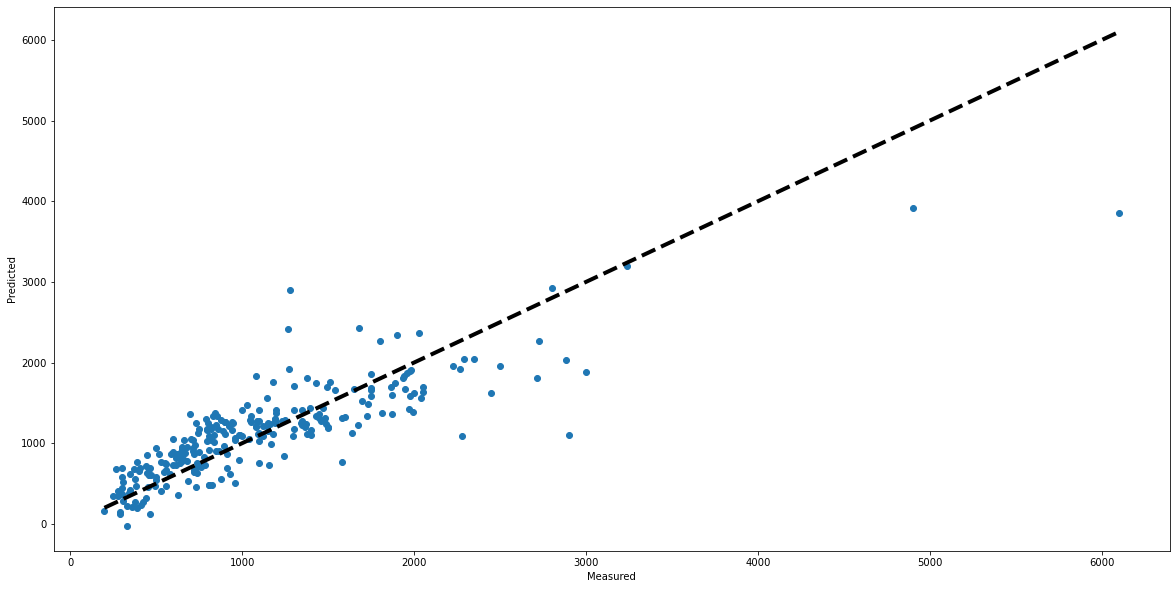

In [82]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [83]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [84]:
X_test.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage', 'X_res', 'Y_res', 'PPI'],
      dtype='object')

In [85]:
X_test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
479,16,334,3,13.3,2073600.0,74,8,256,53,5,1.05,0,256,0,0,1920.0,1080.0,165.632118
1022,7,417,3,13.3,2073600.0,74,8,256,53,5,1.11,0,256,0,0,1920.0,1080.0,165.632118
298,10,202,3,15.6,2073600.0,0,6,1000,18,5,2.40,1000,0,0,0,1920.0,1080.0,141.211998
1265,10,225,3,15.6,2073600.0,92,8,1000,89,5,2.60,1000,0,0,0,1920.0,1080.0,141.211998
774,7,110,4,12.5,1049088.0,68,4,256,47,5,1.26,0,256,0,0,1366.0,768.0,125.367428


In [86]:
y_test.head()

479     1672.0
1022    1149.0
298      499.0
1265     899.0
774     1244.0
Name: Price_euros, dtype: float64

In [87]:
model.predict(X_test[:1])

array([1227.00263849])

In [88]:
len(laptops.columns)

19

In [89]:
from sklearn.ensemble import RandomForestRegressor
sv=RandomForestRegressor()
sv.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
sv_pred=sv.predict(X_test)
sv_pred

array([1433.5394    , 1427.2761    ,  555.2765    ,  938.7317    ,
       1410.9244    , 1625.3694    ,  781.56476667,  447.53244667,
       1282.4497    ,  362.443     , 2101.38666667,  738.8511    ,
       1704.8866    ,  751.32333333, 1725.498     , 1043.3319    ,
       1338.205     , 1017.5979    ,  711.03733333, 1947.721     ,
       2525.0596    ,  721.8508    , 1188.9963    ,  280.26895   ,
       1128.4782    , 1117.1636    ,  713.9488    ,  557.2828    ,
       1652.3387    , 1094.19173333,  462.56152381, 1640.9486    ,
       1503.8365    ,  992.7561    , 1098.668     ,  787.9599    ,
        720.1491    ,  475.1858    , 1254.8188    ,  244.8969    ,
       1700.2044    ,  643.64      ,  728.7054    , 2482.8048    ,
        614.8829    , 1084.65783333, 1731.1092    ,  227.316     ,
        877.0756    , 1436.3498    , 1732.547     ,  516.51495   ,
        936.465     , 1124.5876    ,  571.14816667, 1167.5901    ,
        227.316     ,  979.2883    , 1261.7068    ,  938.7317 

In [91]:
r2_score(y_test, sv_pred)

0.8465105987430341